In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset/train.csv
/kaggle/input/wine-dataset/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/wine-dataset/train.csv')
test_data = pd.read_csv('/kaggle/input/wine-dataset/test.csv')
train_data.shape

(82657, 12)

In [3]:
train_data['country'] = train_data['country'].fillna('unknown')
train_data['region_1'] = train_data['region_1'].fillna('unknown')
train_data['province'] = train_data['province'].fillna('unknown')
train_data['price'] =  train_data['price'].fillna(train_data['price'].mean())
train_data['quality/price']  =np.array(np.log1p(train_data['points']))/np.array(np.log1p(train_data['price']))
train_data['value_for_money'] = train_data['quality/price'].apply(lambda val : 'High' if val > 1.5 else ('Medium' if val > 1.0 else 'Low'))

In [92]:
train_data['all_text_combined0'] = train_data['review_title'] +" " + train_data['review_description']
train_data['all_text_combined3'] = train_data['country'] +" " + train_data['province'] +" " + train_data['region_1'] +" " + train_data['review_title'] +" " + train_data['review_description']

In [5]:
train_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety,quality/price,value_for_money,all_text_combined0
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay,1.847794,High,Andrew Peace 2007 Peace Family Vineyard Chardo...
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend,1.622963,High,North by Northwest 2014 Red (Columbia Valley (...
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo,1.036279,Medium,Renato Ratti 2007 Conca (Barolo) Barolo Conca...
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend,1.427953,Medium,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec,1.272881,Medium,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...


In [6]:
vocab_size =10000
embedding_dim =64
max_length =200
trunc_type = 'post'
padding_type ='post'
oov_token = '<OOV>'

In [7]:
X_train,X_test = train_test_split(train_data,test_size =0.1,random_state =42)

In [8]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(X_train['all_text_combined0'])
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'and': 2,
 'the': 3,
 'a': 4,
 'of': 5,
 'with': 6,
 'this': 7,
 'is': 8,
 'wine': 9,
 'in': 10,
 'flavors': 11,
 'it': 12,
 'to': 13,
 'fruit': 14,
 'on': 15,
 'red': 16,
 'that': 17,
 'palate': 18,
 'aromas': 19,
 'valley': 20,
 'acidity': 21,
 'from': 22,
 'finish': 23,
 'tannins': 24,
 'but': 25,
 'drink': 26,
 "it's": 27,
 'black': 28,
 'cherry': 29,
 'ripe': 30,
 'cabernet': 31,
 'sauvignon': 32,
 'pinot': 33,
 'are': 34,
 'has': 35,
 'for': 36,
 'vineyard': 37,
 'by': 38,
 'dry': 39,
 'oak': 40,
 'spice': 41,
 'noir': 42,
 'its': 43,
 'notes': 44,
 'as': 45,
 'rich': 46,
 'an': 47,
 'chardonnay': 48,
 '2012': 49,
 '2014': 50,
 'berry': 51,
 'full': 52,
 '2013': 53,
 'fresh': 54,
 'de': 55,
 'nose': 56,
 'now': 57,
 'white': 58,
 'blend': 59,
 'plum': 60,
 'fruits': 61,
 'soft': 62,
 'well': 63,
 'sweet': 64,
 '2011': 65,
 '2010': 66,
 'texture': 67,
 'light': 68,
 'apple': 69,
 'blackberry': 70,
 'crisp': 71,
 'dark': 72,
 'bodied': 73,
 'through': 74,
 'syrah': 75

In [9]:
X_train_sequences = tokenizer.texts_to_sequences(X_train['all_text_combined0'])
print(X_train_sequences[1])

[95, 6079, 83, 317, 821, 2789, 164, 4887, 9, 6, 183, 14, 2, 3, 5277, 24, 105, 2, 216, 7457, 81, 3, 605, 201, 45, 64, 24, 2, 21, 4, 9, 17, 1053, 1616, 6, 183, 368]


In [10]:
X_train_padded = pad_sequences(X_train_sequences,truncating=trunc_type,padding=padding_type)

In [11]:
print(X_train_padded[20])

[1984  373   50    1   98  173   20  152   92   19    5  965    1  154
  525   30  123    2  212  189   13  223   39  425    2  276   14   11
    1  111   38  133   21    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [12]:
X_test_sequences = tokenizer.texts_to_sequences(X_test['all_text_combined0'])

In [13]:
X_test_padded = pad_sequences(X_test_sequences,truncating=trunc_type,padding=padding_type)
X_test_padded[1]

array([1441, 1294, 4857, 7584,   53,  713, 7584,  953,  391, 1043,    4,
         56,    6,  320,   16,   14,    2, 1324, 4662,   44,    8,    1,
        202,    3,  639, 1630,   18,    7,   77,   25,  251,  532,   53,
        437,  502,   10,  953,  391, 1043,  792,  266,   60,   70,    2,
        190,   40,   11,   34,  639,   15,    3,   23,    6,    4,  170,
          5,  116,  180,  201,  417,  473, 1329,   26,   74, 1443,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [14]:
lb = LabelEncoder()
Y_train_padded = np.array([[i] for i in lb.fit_transform(X_train['variety'])])
Y_test_padded = np.array([[i] for i in  lb.fit_transform(X_test['variety'])])


In [15]:
Y_train_padded.shape

(74391, 1)

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])

In [83]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 64)          640000    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 128)               66048     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 28)                1820      
Total params: 716,124
Trainable params: 716,124
Non-trainable params: 0
_________________________________________________________________


In [84]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

In [85]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [86]:
num_epochs = 10
history = model.fit(X_train_padded, Y_train_padded, epochs=num_epochs, validation_data=(X_test_padded, Y_test_padded), verbose=1)

Train on 74391 samples, validate on 8266 samples
Epoch 1/10
74391/74391 [==============================] - 56s 759us/sample - loss: 0.2763 - accuracy: 0.9174 - val_loss: 0.1473 - val_accuracy: 0.9545
Epoch 2/10
74391/74391 [==============================] - 53s 714us/sample - loss: 0.1097 - accuracy: 0.9648 - val_loss: 0.1412 - val_accuracy: 0.9575
Epoch 3/10
74391/74391 [==============================] - 53s 711us/sample - loss: 0.1031 - accuracy: 0.9670 - val_loss: 0.1383 - val_accuracy: 0.9591
Epoch 4/10
74391/74391 [==============================] - 53s 712us/sample - loss: 0.1039 - accuracy: 0.9676 - val_loss: 0.1339 - val_accuracy: 0.9632
Epoch 5/10
74391/74391 [==============================] - 53s 714us/sample - loss: 0.0973 - accuracy: 0.9699 - val_loss: 0.1273 - val_accuracy: 0.9596
Epoch 6/10
74391/74391 [==============================] - 53s 713us/sample - loss: 0.0996 - accuracy: 0.9694 - val_loss: 0.1387 - val_accuracy: 0.9543
Epoch 7/10
74391/74391 [=====================

In [87]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

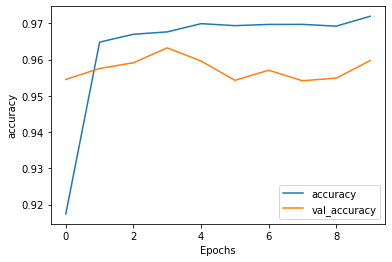

In [88]:
plot_graphs(history, 'accuracy')

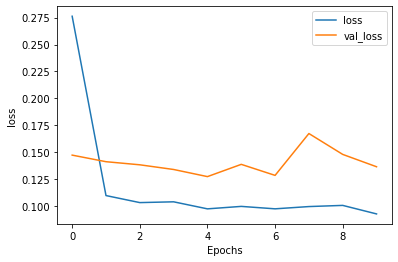

In [89]:
plot_graphs(history, 'loss')

In [95]:
X_train,X_test = train_test_split(train_data,test_size =0.1,random_state =42)

In [96]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(X_train['all_text_combined3'])
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'and': 2,
 'the': 3,
 'a': 4,
 'of': 5,
 'with': 6,
 'this': 7,
 'is': 8,
 'wine': 9,
 'valley': 10,
 'in': 11,
 'flavors': 12,
 'us': 13,
 'it': 14,
 'to': 15,
 'fruit': 16,
 'california': 17,
 'on': 18,
 'red': 19,
 'that': 20,
 'palate': 21,
 'aromas': 22,
 'acidity': 23,
 'from': 24,
 'finish': 25,
 'tannins': 26,
 'but': 27,
 'drink': 28,
 "it's": 29,
 'black': 30,
 'cherry': 31,
 'ripe': 32,
 'france': 33,
 'cabernet': 34,
 'sauvignon': 35,
 'pinot': 36,
 'are': 37,
 'has': 38,
 'for': 39,
 'dry': 40,
 'de': 41,
 'vineyard': 42,
 'by': 43,
 'unknown': 44,
 'oak': 45,
 'spice': 46,
 'noir': 47,
 'its': 48,
 'notes': 49,
 'as': 50,
 'rich': 51,
 'an': 52,
 'chardonnay': 53,
 'italy': 54,
 '2012': 55,
 '2014': 56,
 'berry': 57,
 'full': 58,
 '2013': 59,
 'fresh': 60,
 'nose': 61,
 'now': 62,
 'bordeaux': 63,
 'white': 64,
 'blend': 65,
 'plum': 66,
 'fruits': 67,
 'soft': 68,
 'well': 69,
 'sweet': 70,
 '2011': 71,
 '2010': 72,
 'texture': 73,
 'light': 74,
 'apple': 7

In [97]:
X_train_sequences = tokenizer.texts_to_sequences(X_train['all_text_combined3'])
X_train_padded = pad_sequences(X_train_sequences,truncating=trunc_type,padding=padding_type)
X_test_sequences = tokenizer.texts_to_sequences(X_test['all_text_combined3'])
X_test_padded = pad_sequences(X_test_sequences,truncating=trunc_type,padding=padding_type)

In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])

In [99]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)

In [100]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model.fit(X_train_padded, Y_train_padded, epochs=num_epochs, validation_data=(X_test_padded, Y_test_padded), verbose=1)

Train on 74391 samples, validate on 8266 samples
Epoch 1/10
26944/74391 [=========>....................] - ETA: 36s - loss: 0.5213 - accuracy: 0.8440

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')